In [1]:
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from wordcloud import WordCloud

In [2]:
file_path = "DATA/SBQ_CSV.csv"
data = pd.read_csv(file_path, delimiter=",", quotechar='"', on_bad_lines='skip')

def plot_Author_bar(authors_counts, context_label="Authors", bar_color="royalblue", max_y_text_pos=18):
    authors, counts = zip(*authors_counts)
    
    plt.figure(figsize=(10, 6))
    bars = plt.barh(authors, counts, color=bar_color)

    for bar, count in zip(bars, counts):
        plt.text(bar.get_width() / 2,
                 bar.get_y() + bar.get_height() / 2,
                 str(count),
                 ha='center', va='center', fontsize=12, color='white')

    plt.text(max(counts) * 0.6, max_y_text_pos, context_label,
             fontsize=12, color='black', bbox=dict(facecolor='white', alpha=0.7, edgecolor='black'))

    plt.xlabel('Frequency')
    plt.ylabel('Authors')
    plt.tight_layout()
    plt.show()

def plot_Author_wordcloud(Author_counter, title="WordCloud of Unified authors"):
    
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(Author_counter)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    #plt.title(title, fontsize=14)
    plt.tight_layout()
    plt.show()

Author_mapping = {}

def reverse_map_Author(Author, mapping):
    for main_Author, variations in mapping.items():
        if Author.lower() == main_Author.lower() or Author.lower() in variations or main_Author.lower() in Author.lower():
            return main_Author
    else:
        return Author

import pandas as pd
import matplotlib.pyplot as plt

def plot_comparison_bar(counts_a, counts_b, label_a="Year A", label_b="Year B",
                        bar_colors=("red", "purple"), title="Author Frequency Comparison", n=20):
    combined_authors = (counts_a + counts_b).most_common(n)
    authors = [k for k, _ in combined_authors]

    
    df = pd.DataFrame({
        label_a: [counts_a.get(k, 0) for k in authors],
        label_b: [counts_b.get(k, 0) for k in authors]
    }, index=authors)

    ax = df.plot(kind='barh', figsize=(10, 6), color=bar_colors)

   
    for i, Author in enumerate(df.index):
        val_a = df.loc[Author, label_a]
        val_b = df.loc[Author, label_b]
        
        if val_a > 0:
            ax.text(val_a + 0.5, i - 0.15, str(val_a), color='white',
                    fontsize=9, ha='left', va='center', fontweight='bold',
                    bbox=dict(facecolor=bar_colors[0], edgecolor='none', boxstyle='round,pad=0.2'))
        
        if val_b > 0:
            ax.text(val_b + 0.5, i + 0.15, str(val_b), color='white',
                    fontsize=9, ha='left', va='center', fontweight='bold',
                    bbox=dict(facecolor=bar_colors[1], edgecolor='none', boxstyle='round,pad=0.2'))

    plt.xlabel("Frequency")
    plt.ylabel("Author")
    #plt.title(title)
    plt.gca().invert_yaxis() 
    plt.tight_layout()
    plt.show()


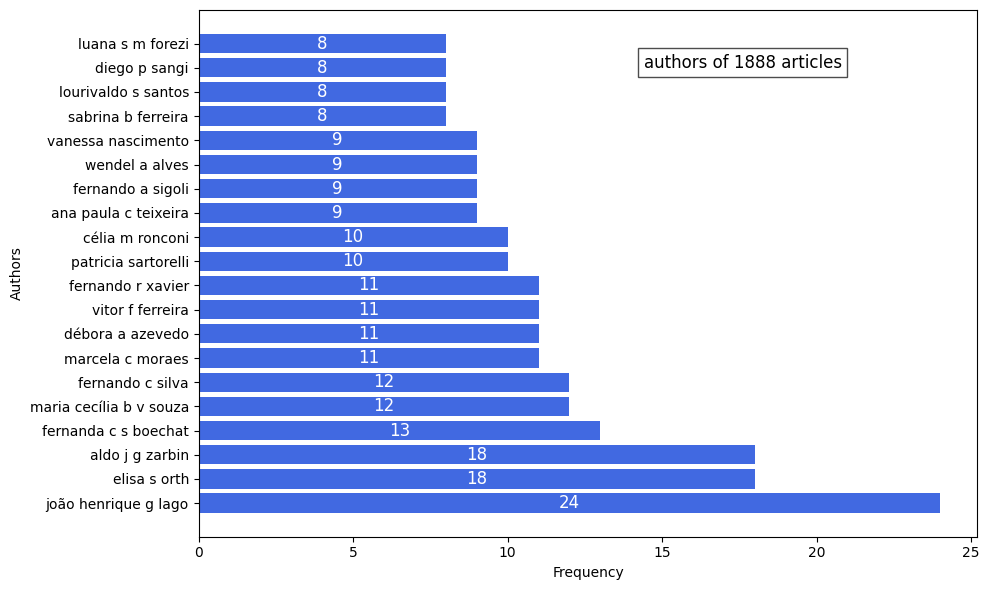

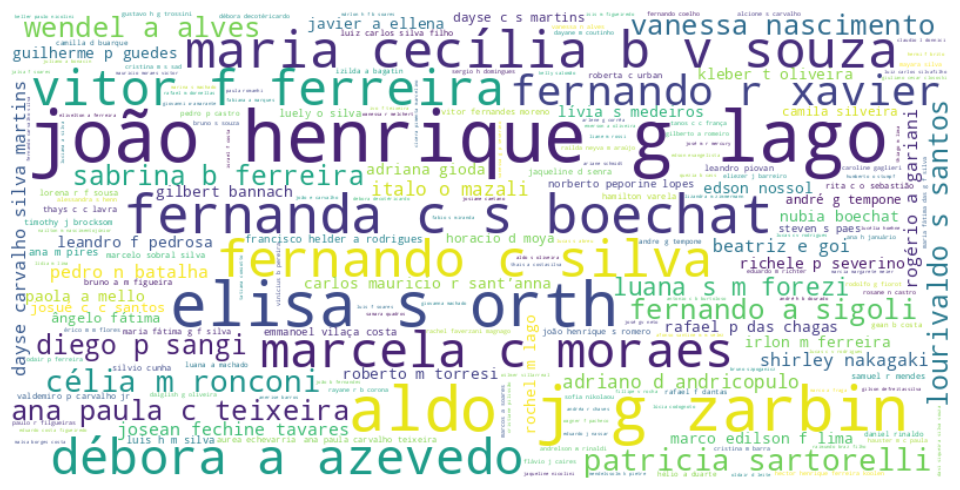

In [3]:

authors = data['Authors'].dropna()

all_authors = (
    authors
    .str.split(r'\s*(?:;|,|\band\b)\s*', regex=True)
    #|\be\b
    .explode()                
    .str.strip()              
    .str.lower()              
    .replace({
    "'": "", 
    "1": "", 
    "2": "", 
    "3": "", 
    r" \(pq\)": "", 
    r" \(pg\)": "", 
    r"\*": "",
    r"\-": "",
    r"\.": "",
    " da ":" ",
    " de ":" "
    }, regex=True)
)

all_authors = all_authors[all_authors != ""].dropna()

mapped_authors = all_authors.apply(lambda x: reverse_map_Author(x, Author_mapping))

Author_counts_geral = Counter(mapped_authors)
top_authors = Author_counts_geral.most_common(20)
authors, counts = zip(*top_authors)

# Etapa 6: Visualização
plot_Author_bar(top_authors, context_label="authors of 1888 articles")
plot_Author_wordcloud(Author_counts_geral)


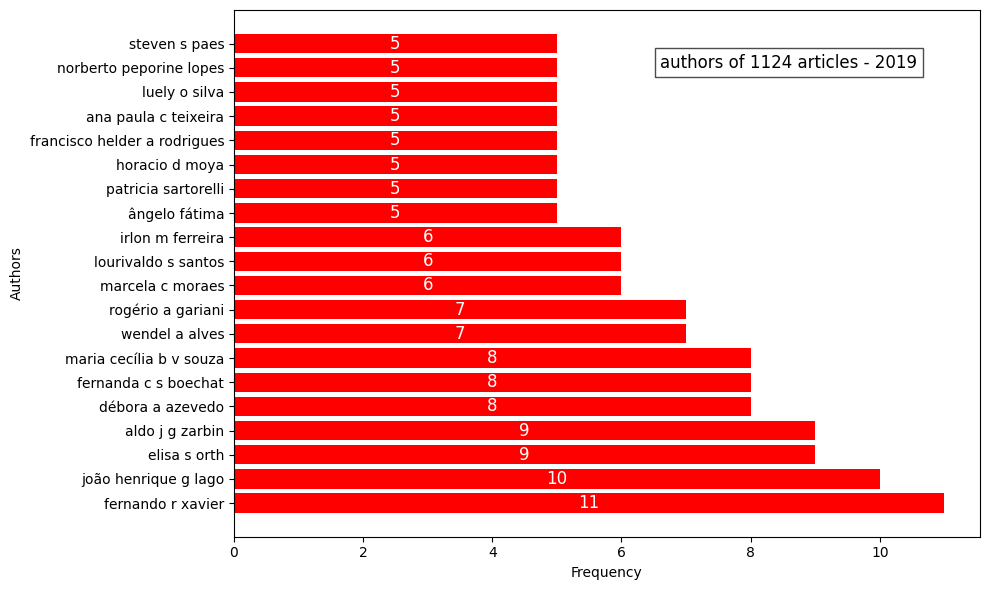

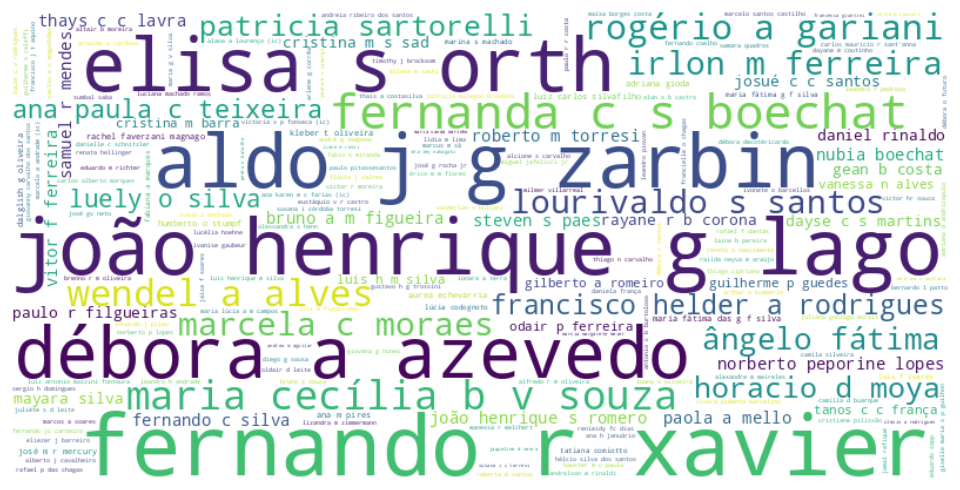

In [4]:
# Filter only articles from the year 2019
data_2019 = data[data['Year'] == 2019]

authors = data_2019['Authors'].dropna()
#all_authors = (authors.str.split(r'[;,]').explode().str.strip().str.lower().str.replace("'", ""))

all_authors = (
    authors
    .str.split(r'\s*(?:;|,|\band\b)\s*', regex=True)
    .explode()                
    .str.strip()              
    .str.lower()              
    .replace({
    "'": "", 
    "1": "", 
    "2": "", 
    "3": "", 
    r" \(pq\)": "", 
    r" \(pg\)": "", 
    r"\*": "",
    r"\-": "",
    r"\.": "",
    " da ":" ",
    " de ":" "
    }, regex=True)
)
all_authors = all_authors[all_authors != ""].dropna()
# Apply reverse mapping to standardize Author terms
mapped_authors = all_authors.apply(lambda x: reverse_map_Author(x, Author_mapping))
Author_counts_2019 = Counter(mapped_authors)
top_authors = Author_counts_2019.most_common(20)
authors, counts = zip(*top_authors)

plot_Author_bar(top_authors, context_label="authors of 1124 articles - 2019", bar_color="red")
plot_Author_wordcloud(Author_counts_2019)


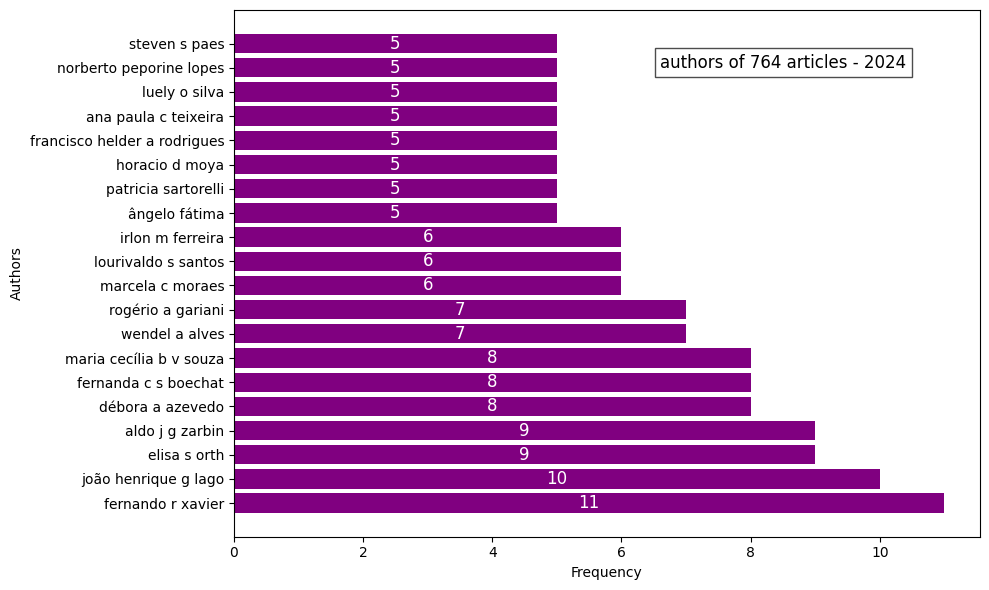

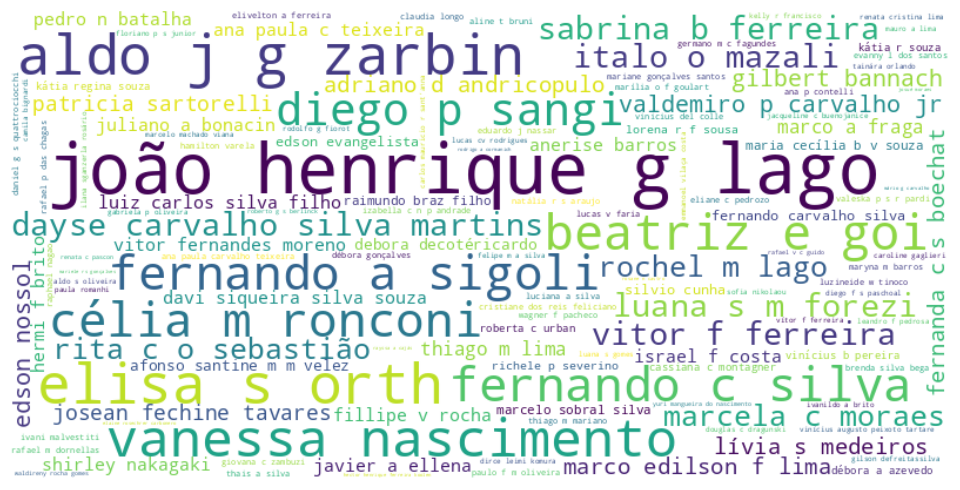

In [5]:
# Filter only articles from the year 2019
data_2019 = data[data['Year'] == 2024]

# Extract and process authors from the filtered DataFrame
authors = data_2019['Authors'].dropna()
#all_authors = (authors.str.split(r'[;,]').explode().str.strip().str.lower().str.replace("'", ""))

all_authors = (
    authors
    .str.split(r'\s*(?:;|,|\band\b)\s*', regex=True)
    .explode()                
    .str.strip()              
    .str.lower()              
    .replace({
    "'": "", 
    "1": "", 
    "2": "", 
    "3": "", 
    r" \(pq\)": "", 
    r" \(pg\)": "", 
    r"\*": "",
    r"\-": "",
    r"\.": "",
    " da ":" ",
    " de ":" "
    }, regex=True)
)
all_authors = all_authors[all_authors != ""].dropna()
mapped_authors = all_authors.apply(lambda x: reverse_map_Author(x, Author_mapping))
Author_counts_2024 = Counter(mapped_authors)
top_authors = Author_counts_2019.most_common(20)
authors, counts = zip(*top_authors)

plot_Author_bar(top_authors, context_label="authors of 764 articles - 2024", bar_color="purple")
plot_Author_wordcloud(Author_counts_2024)

In [ ]:
from collections import Counter

# Suponha que você já tenha os Counters
plot_comparison_bar(
    counts_a=Author_counts_2019,
    counts_b=Author_counts_2024,
    label_a="2019",
    label_b="2024",
    #title="Author Frequency Comparison: 2019 vs 2024"
)